# Credit Card fraud detection!¶

In this project we will be implementing a technique an technique called SMOTE, supervised models, semi supervised learning algorithms and a deep learning model.



In Machine Learning and Data Science we often come across a term called Imbalanced Data Distribution, it happens when observations in one of the class are much higher or lower than the other classes.examples such as Fraud Detection, Anomaly Detection etc.


In [1]:
import pandas as pd

* This below code snippet prepares a dataset for a machine learning model by reading a CSV file, separating features and labels, 
* splitting the data into training and testing sets, standardizing the features, and flattening the label arrays. 
* The goal is likely to train a machine learning model for credit card fraud detection.

In [2]:
train_df = pd.read_csv("creditcard.csv")
X = train_df.drop(columns={'Class'})
y = train_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_test = y_test.ravel()
y_train = y_train.ravel()

C:\Users\rvavilap\AppData\Local\Temp\ipykernel_29128\209489824.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()
C:\Users\rvavilap\AppData\Local\Temp\ipykernel_29128\209489824.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


* In this context, y_test and y_train are one-dimensional arrays that contain the labels for the corresponding test and training sets, respectively. The ravel() method is used to convert these arrays into one-dimensional arrays.

Here's a bit more detail:

#### Original State:

* Before applying ravel(),y_test and y_train might be two-dimensional arrays with a shape like (n_samples, 1), where each row corresponds to a label.

#### After Applying ravel():

* The ravel() method flattens the array, converting it into a one-dimensional array. Now, the shape of y_test and y_train would be (n_samples,), where n_samples is the number of elements in the array.

In many machine learning libraries, it's common to work with one-dimensional arrays for labels, and using ravel() ensures that the shape of the label arrays is compatible with the requirements of various machine learning algorithms.

In summary, the flattening step is simply reshaping the label arrays to be one-dimensional, which is a common practice in machine learning workflows.









In [3]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
train_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

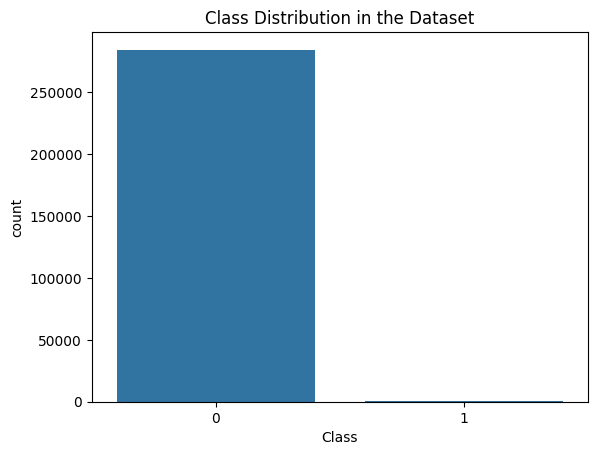

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Class' is the column indicating the class in your dataset
sns.countplot(x='Class', data=train_df)
plt.title('Class Distribution in the Dataset')
plt.show()


<Axes: >

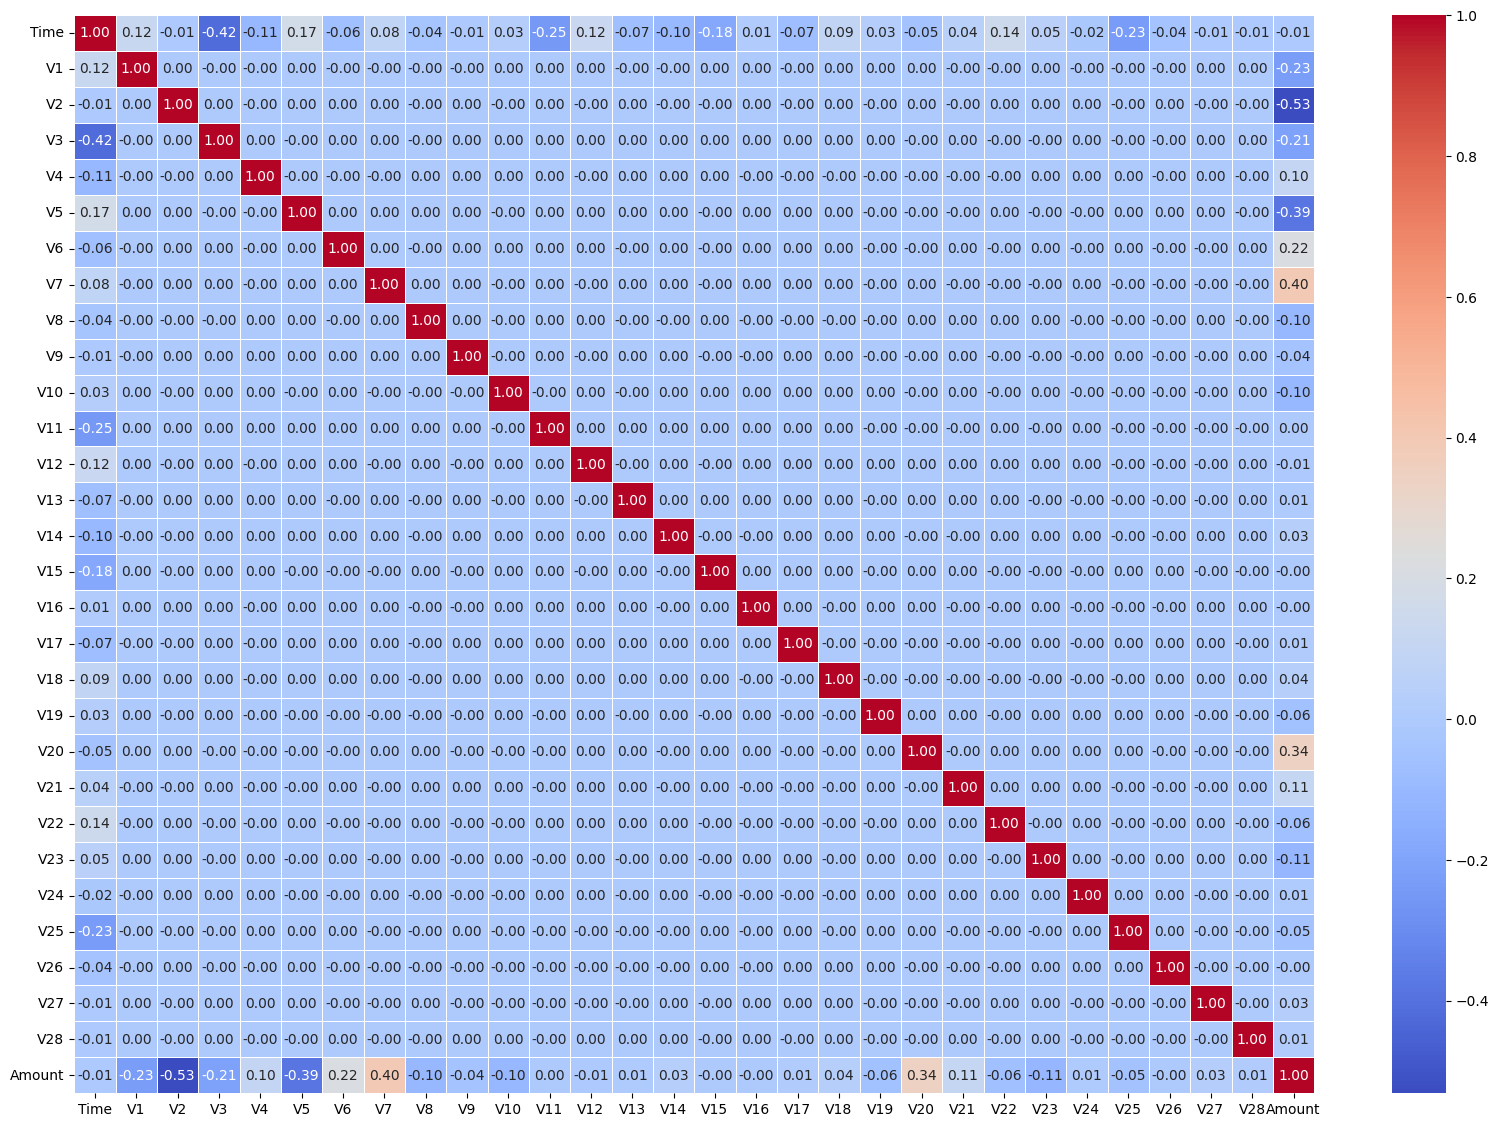

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,14))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

* **The correlation matrix corr is calculated using the corr() method on the DataFrame X. The correlation matrix shows how each feature in X is correlated with every other feature.**



#### Positive Correlation:

When two variables have a positive correlation, it means that as the value of one variable increases, the value of the other variable also tends to increase. In other words, they move in the same direction.
A correlation coefficient close to +1 indicates a strong positive correlation.
#### Negative Correlation:

Conversely, in a negative correlation, as the value of one variable increases, the value of the other variable tends to decrease. They move in opposite directions.
A correlation coefficient close to -1 indicates a strong negative correlation.
#### No Correlation (or Zero Correlation):

A correlation coefficient close to 0 suggests no linear relationship between the two variables. Changes in one variable do not predict changes in the other.
It's important to note that a zero correlation does not imply the absence of any relationship; it just means that the relationship is not linear.

# Accuray terminology

In a confusion matrix, the terms "correct predictions" and "wrong predictions" are usually interpreted based on the comparison of the predicted labels with the true labels. Let's break down the elements of a confusion matrix:

Consider a binary classification problem with two classes: "Positive" and "Negative."

- **True Positive (TP):**
  - Instances that are actually positive and are correctly predicted as positive.

- **True Negative (TN):**
  - Instances that are actually negative and are correctly predicted as negative.

- **False Positive (FP):**
  - Instances that are actually negative but are incorrectly predicted as positive.

- **False Negative (FN):**
  - Instances that are actually positive but are incorrectly predicted as negative.

Here's a visual representation:

```
                 Predicted
                 Positive   Negative
Actual   Positive    TP        FN
         Negative    FP        TN
```

Now, in terms of correctness:

- **Correct Predictions (Correctly Classified):**
  - True Positives (TP): Instances correctly predicted as positive.
  - True Negatives (TN): Instances correctly predicted as negative.

- **Wrong Predictions (Misclassifications):**
  - False Positives (FP): Instances incorrectly predicted as positive when they are actually negative.
  - False Negatives (FN): Instances incorrectly predicted as negative when they are actually positive.

In summary:

- **Correct Predictions:** TP + TN
- **Wrong Predictions:** FP + FN

The confusion matrix provides a detailed breakdown of the model's performance, helping to analyze where it makes correct predictions and where it makes errors. The goal is often to maximize true positives and true negatives while minimizing false positives and false negatives, depending on the specific objectives and constraints of the problem.

The F1 score, precision, and recall are three common metrics used to evaluate the performance of a classification model, particularly in the context of binary classification problems. Let's explore each metric:

1. **Precision:**
   - Precision is a measure of the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the sum of true positives and false positives. Precision is concerned with how many of the predicted positive instances are actually positive.
   - Precision = True Positives / (True Positives + False Positives)

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall measures the ability of the model to capture all the relevant instances (actual positives). It is the ratio of true positive predictions to the sum of true positives and false negatives. Recall is concerned with how many of the actual positive instances were correctly predicted by the model.
   - Recall = True Positives / (True Positives + False Negatives)

3. **F1 Score:**
   - The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when there is an uneven class distribution (imbalanced classes). The F1 score is high when both precision and recall are high.
   - F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

   The F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates poor performance.

In summary:

- **Precision:** Focuses on the accuracy of positive predictions.
- **Recall:** Focuses on capturing all actual positive instances.
- **F1 Score:** Balances precision and recall, providing a single metric that considers both false positives and false negatives.

These metrics are especially important when dealing with imbalanced datasets, where one class significantly outnumbers the other. Depending on the problem, you might prioritize precision over recall or vice versa, and the F1 score helps strike a balance between the two.

## **without applying smote which is use for balance the dataset**

#  1) Logistic Regression

In [9]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [10]:
# predictiing the test result
y_pred = classifier.predict(X_test)


<Axes: >

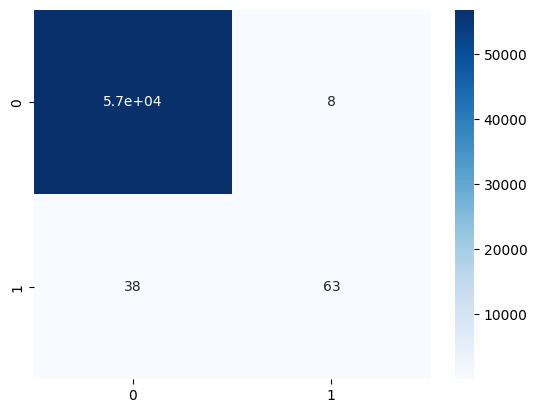

In [11]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,cmap='Blues')


In [12]:
#find accuracy
from sklearn.metrics import accuracy_score
print('logistic regression:',accuracy_score(y_test,y_pred))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

logistic regression: 0.9991924440855307
f1_score: 0.7325581395348837
precision_score: 0.8873239436619719
recall_score: 0.6237623762376238


# 2) Naive Bayes

In [13]:
# Fitting naive byes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

In [14]:
# Predicting the Test set results
y_pred2 = classifier.predict(X_test)


<Axes: >

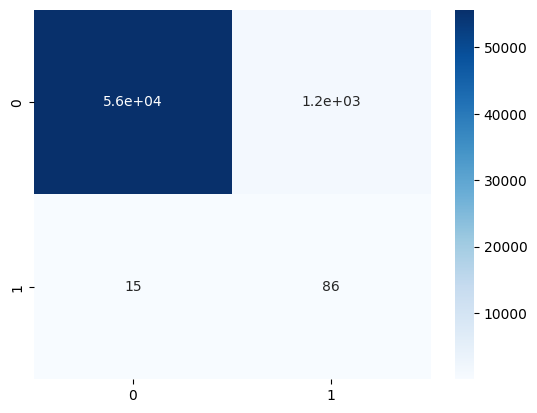

In [15]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap = 'Blues')


In [16]:
#find accuracy
from sklearn.metrics import accuracy_score
print('naive byes:',accuracy_score(y_test,y_pred2))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred2))
print('precision_score:',precision_score(y_test,y_pred2))
print('recall_score:',recall_score(y_test,y_pred2))

naive byes: 0.9787402127734279
f1_score: 0.12436731742588576
precision_score: 0.06708268330733229
recall_score: 0.8514851485148515


#   3) Decision Tree

In [17]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
# Predicting the Test set results
y_pred3 = classifier.predict(X_test)


<Axes: >

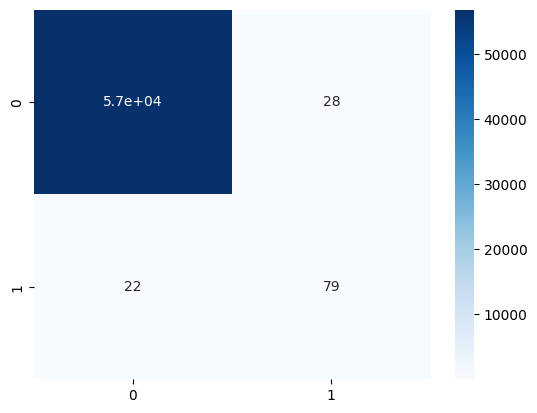

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
import seaborn as sns
sns.heatmap(cm3, annot=True, cmap = 'Blues')


In [20]:
#find accuracy
from sklearn.metrics import accuracy_score
print('decision tree:',accuracy_score(y_test,y_pred3))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred3))
print('precision_score:',precision_score(y_test,y_pred3))
print('recall_score:',recall_score(y_test,y_pred3))

decision tree: 0.9991222218320986
f1_score: 0.7596153846153846
precision_score: 0.7383177570093458
recall_score: 0.7821782178217822


# 4) Random Forest

In [21]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [22]:
# Predicting the Test set results
y_pred4 = classifier.predict(X_test)


<Axes: >

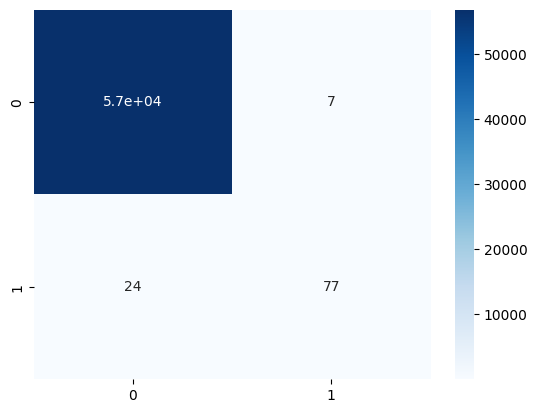

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
import seaborn as sns
sns.heatmap(cm4, annot=True, cmap = 'Blues')


In [24]:
#find accuracy
from sklearn.metrics import accuracy_score
print('random forest:',accuracy_score(y_test,y_pred4))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred4))
print('precision_score:',precision_score(y_test,y_pred4))
print('recall_score:',recall_score(y_test,y_pred4))

random forest: 0.9994557775359011
f1_score: 0.8324324324324325
precision_score: 0.9166666666666666
recall_score: 0.7623762376237624


# 5) ANN

In [25]:
#ANN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()


C:\Users\rvavilap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.68 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)



Epoch 1/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8177 - loss: 0.5447
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9983 - loss: 0.0831
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9985 - loss: 0.0185
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0091
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0064
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0051
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0048
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0041
Epoch 9/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 10/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 11/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9994 - loss: 0.0030
Epoch 12/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [28]:
# Predicting the Test set results
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


<Axes: >

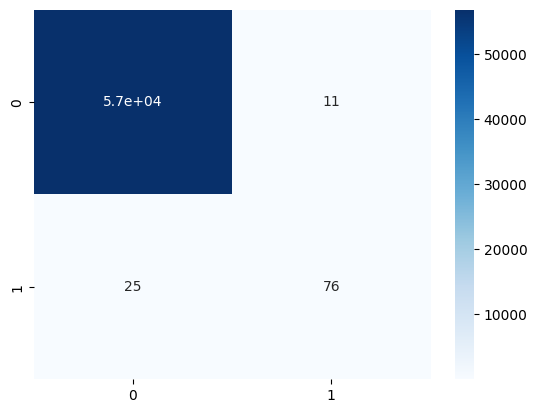

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, cmap = 'Blues')


In [30]:
#find accuracy
from sklearn.metrics import accuracy_score
print('ANN:',accuracy_score(y_test,y_pred5))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred5))
print('precision_score:',precision_score(y_test,y_pred5))
print('recall_score:',recall_score(y_test,y_pred5))

ANN: 0.9993679997191109
f1_score: 0.8085106382978723
precision_score: 0.8735632183908046
recall_score: 0.7524752475247525


This code snippet is implementing an Artificial Neural Network (ANN) using the Keras library for binary classification. Let's break down the code:

```python
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
```

Here, the necessary libraries and packages from Keras are imported for building and training the neural network.

```python
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation='relu', input_dim=30))
classifier.add(Dense(10, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))
```

The neural network model is initialized using the `Sequential` class from Keras. Three layers are added to the model:
- The first layer has 10 neurons, uses the ReLU activation function, and expects an input of 30 features.
- The second layer has 10 neurons with the ReLU activation function.
- The output layer has 1 neuron with the sigmoid activation function, suitable for binary classification.

```python
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

In the quoted part, it's describing the compilation step of the artificial neural network (ANN) model using the Keras library. Let me break it down:


- **Optimizer ('adam'):** Adam is an optimization algorithm commonly used for training neural networks. It's a variant of stochastic gradient descent (SGD) that adapts the learning rates of each parameter during training, which can result in faster convergence.

- **Loss ('binary_crossentropy'):** Binary crossentropy is the loss function used for binary classification problems. It measures the difference between the true labels and the predicted probabilities. In binary classification, where the goal is to predict either 0 or 1, binary crossentropy is a suitable loss function.

- **Metrics (['accuracy']):** During training, the model's performance is evaluated using metrics. In this case, the metric used is accuracy. Accuracy is a common metric for classification problems and represents the percentage of correctly predicted instances out of the total instances.

In summary, the `compile` step configures the artificial neural network model for training by specifying the optimizer, loss function, and evaluation metric. The Adam optimizer, binary crossentropy loss, and accuracy metric are commonly used choices for binary classification tasks.

The model is compiled using the Adam optimizer, binary crossentropy loss (common for binary classification problems), and accuracy as the evaluation metric.

```python
classifier.summary()
```

This line prints a summary of the model architecture, showing the number of parameters and the structure of each layer.

```python
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=1000, epochs=20)
```

The model is trained using the training set (`X_train`, `y_train`). The training is done for 20 epochs with a batch size of 1000.

```python
# Predicting the Test set results
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)
```

The model is used to predict the labels for the test set (`X_test`). The output probabilities are rounded to obtain binary predictions (0 or 1) by using a threshold of 0.5.

```python
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True)
```

A confusion matrix is created using the predicted labels (`y_pred5`) and the true labels (`y_test`). The confusion matrix is then visualized using Seaborn's heatmap.

```python
# Find accuracy
from sklearn.metrics import accuracy_score
print('ANN:', accuracy_score(y_test, y_pred5))
```

The accuracy of the model is calculated using the `accuracy_score` function.

```python
# Find classification report
from sklearn.metrics import f1_score, precision_score, recall_score
print('f1_score:', f1_score(y_test, y_pred5))
print('precision_score:', precision_score(y_test, y_pred5))
print('recall_score:', recall_score(y_test, y_pred5))
```

Additional classification metrics (F1 score, precision, and recall) are calculated and printed.

In summary, this code snippet defines, compiles, trains, and evaluates a simple neural network using Keras for binary classification, and it reports various performance metrics including accuracy, precision, recall, and the confusion matrix.

# Applying SMOTE

#### Smote for balance the dataset you can see the difference in classification report.

In [31]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

We have a clearly imbalanced data. It's very common when treating of frauds

In [32]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [33]:
fraud = train_df[train_df['Class'] == 1]
valid = train_df[train_df['Class'] == 0]

print("Fraud transaction statistics")
print(fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(valid["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [34]:
# describes info about train and test set
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (227845, 30)
y_train dataset:  (227845,)
X_test dataset:  (56962, 30)
y_test dataset:  (56962,)


In [35]:
print("before applying smote:",format(sum(y_train == 1)))
print("before applying smote:",format(sum(y_train == 0)))

before applying smote: 391
before applying smote: 227454


In [36]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [37]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [38]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [40]:
X_train.shape

(227845, 30)

In [41]:
y_train.shape

(227845,)

In [42]:
train_df = pd.read_csv("creditcard.csv")
X = train_df.drop(columns={'Class'})
y = train_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [43]:
from imblearn.over_sampling import SMOTE


In [44]:

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)


print('After applying SMOTE X_train: {}\n'.format(X_train.shape))
print('After applying SMOTE y_train: {}\n'.format(y_train.shape))

print("After applying SMOTE label '1': {}\n".format(sum(y_train == 1)))
print("After applying SMOTE label '0': {}\n".format(sum(y_train == 0)))

After applying SMOTE X_train: (454908, 30)

After applying SMOTE y_train: (454908,)

After applying SMOTE label '1': 227454

After applying SMOTE label '0': 227454



## **Models trained after applying smote**

#  1) Logistic Regression

In [45]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
# predictiing the test result
y_pred = classifier.predict(X_test)

<Axes: >

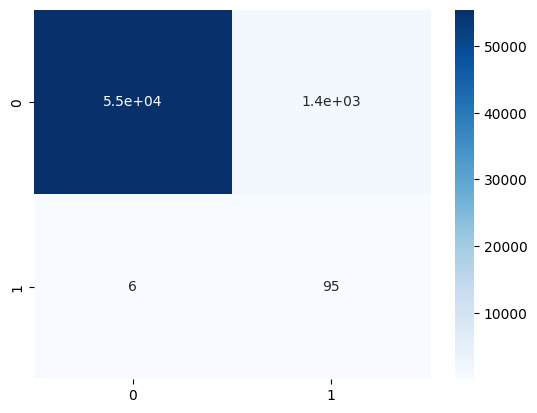

In [47]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True,cmap='Blues')


In [48]:
#find accuracy
from sklearn.metrics import accuracy_score
print('logistic regression:',accuracy_score(y_test,y_pred))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

logistic regression: 0.9757557670025631
f1_score: 0.12094207511139402
precision_score: 0.06462585034013606
recall_score: 0.9405940594059405


# 2) Naive Bayes

In [49]:
# Fitting naive byes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [50]:
# Predicting the Test set results
y_pred2 = classifier.predict(X_test)


<Axes: >

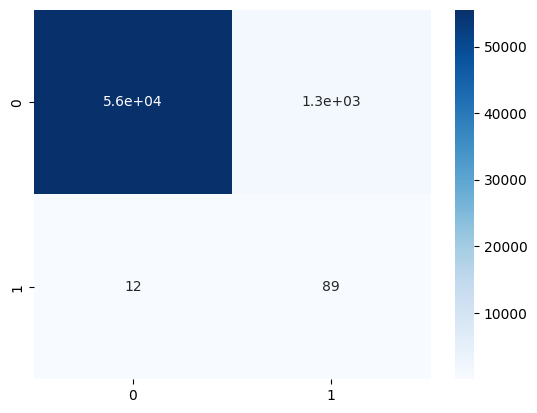

In [51]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)
import seaborn as sns
sns.heatmap(cm2, annot=True, cmap = 'Blues')


In [52]:
#find accuracy
from sklearn.metrics import accuracy_score
print('naive byes:',accuracy_score(y_test,y_pred2))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred2))
print('precision_score:',precision_score(y_test,y_pred2))
print('recall_score:',recall_score(y_test,y_pred2))

naive byes: 0.9764931006636003
f1_score: 0.11733684904416612
precision_score: 0.06285310734463277
recall_score: 0.8811881188118812


#   3) Decision Tree

In [53]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
# Predicting the Test set results
y_pred3 = classifier.predict(X_test)


<Axes: >

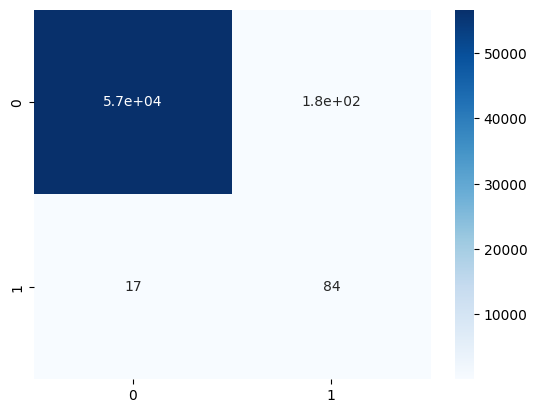

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred3)
import seaborn as sns
sns.heatmap(cm3, annot=True, cmap = 'Blues')


In [56]:
#find accuracy
from sklearn.metrics import accuracy_score
print('decision tree:',accuracy_score(y_test,y_pred3))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred3))
print('precision_score:',precision_score(y_test,y_pred3))
print('recall_score:',recall_score(y_test,y_pred3))

decision tree: 0.9964713317650363
f1_score: 0.45528455284552843
precision_score: 0.31343283582089554
recall_score: 0.8316831683168316


# 4) Random Forest

In [57]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [58]:
# Predicting the Test set results
y_pred4 = classifier.predict(X_test)


<Axes: >

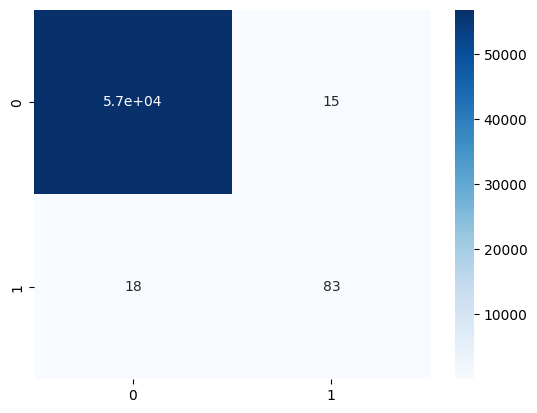

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)
import seaborn as sns
sns.heatmap(cm4, annot=True, cmap = 'Blues')


In [60]:
#find accuracy
from sklearn.metrics import accuracy_score
print('random forest:',accuracy_score(y_test,y_pred4))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred4))
print('precision_score:',precision_score(y_test,y_pred4))
print('recall_score:',recall_score(y_test,y_pred4))

random forest: 0.999420666409185
f1_score: 0.8341708542713567
precision_score: 0.8469387755102041
recall_score: 0.8217821782178217


# 5) ANN

In [61]:
#ANN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [62]:
# Initialising the ANN
classifier = Sequential()
classifier.add(Dense(10, activation = 'relu', input_dim = 30))
classifier.add(Dense(10, activation = 'relu'))
classifier.add(Dense(1,  activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()


C:\Users\rvavilap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 431 (1.68 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20)



Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7012 - loss: 0.5277
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9541 - loss: 0.1123
Epoch 3/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.0802
Epoch 4/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9777 - loss: 0.0611
Epoch 5/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9837 - loss: 0.0492
Epoch 6/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0417
Epoch 7/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9891 - loss: 0.0368
Epoch 8/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0328
Epoch 9/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0287
Epoch 10/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9924 - loss: 0.0260
Epoch 11/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0242
Epoch 12/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [64]:
# Predicting the Test set results
y_pred5 = classifier.predict(X_test).round()
y_pred5 = (y_pred5 > 0.5)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


<Axes: >

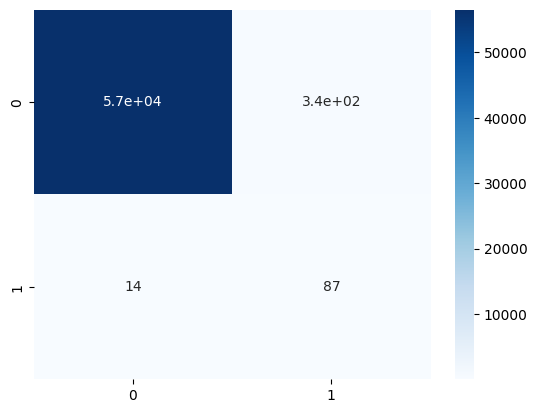

In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm5 = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm5, annot=True, cmap = 'Blues')


In [66]:
#find accuracy
from sklearn.metrics import accuracy_score
print('ANN:',accuracy_score(y_test,y_pred5))
# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score
print('f1_score:',f1_score(y_test,y_pred5))
print('precision_score:',precision_score(y_test,y_pred5))
print('recall_score:',recall_score(y_test,y_pred5))

ANN: 0.993750219444542
f1_score: 0.3283018867924528
precision_score: 0.20279720279720279
recall_score: 0.8613861386138614
